<a href="https://colab.research.google.com/github/AngeLr721/tarea_cinco/blob/main/segunda_ecuacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers, layers, models, losses, metrics
from tensorflow.keras.layers import Dense, Dropout,Activation
from tensorflow.keras.optimizers import RMSprop, Adam, Nadam, Adamax

from matplotlib import pyplot as plt
import numpy as np

In [2]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
      return [self.loss_tracker]

    def train_step(self, data):
         batch_size = tf.shape(data)[0]
         batch_size=100

         min = tf.cast(tf.reduce_min(data),tf.float32)
         max = tf.cast(tf.reduce_max(data),tf.float32)
         x = tf.random.uniform((batch_size,1), minval=min, maxval=max)

         with tf.GradientTape() as tape:
            #Loss value
            with tf.GradientTape() as g:
                g.watch(x)

                with tf.GradientTape() as gg:
                    gg.watch(x)
                    y_pred = self(x, training=True)

                y_x = gg.gradient(y_pred,x)
                #jdnjde

            y_xx=g.gradient(y_x,x)

            sode = y_xx + y_pred

            y_init = self(x, training=True)
            loss = self.mse(0.,sode)+self.mse(tf.math.sin(x)-0.5*tf.math.cos(x), y_init)

         grads = tape.gradient(loss, self.trainable_variables)
         self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

         self.loss_tracker.update_state(loss)
         # Return a dict mapping metric names to current value
         return {"loss": self.loss_tracker.result()}

In [3]:
model = ODEsolver()

model.add(Dense(100, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "od_esolver"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               200       
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1221 (4.77 KB)
Trainable params: 1221 (4.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
model.compile(optimizer="adam", metrics=['loss'])

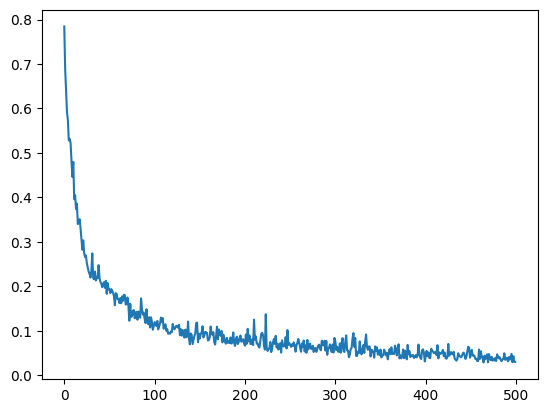

In [5]:
x = tf.linspace(-5,5,100)
# Entrenar el modelo
history = model.fit(x, epochs=500, verbose=0)
# Graficar la pérdida
plt.plot(history.history["loss"])

4/4 [==============================] - 0s 2ms/step


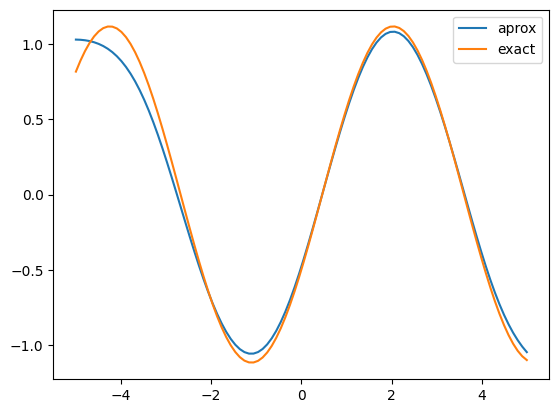

In [6]:
x_testv = tf.linspace(-5,5,100)
a=model.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv, (tf.sin(x)-0.5*tf.cos(x)), label="exact")
plt.legend()
plt.show()